In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [76]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Training data.xlsx')
data1=data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Test data.xlsx')
# data = pd.read_excel('Training data.xlsx') if using a jupyter notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
print(data.columns)
data.columns[1]

Index(['internet', 'sex', 'traveltime', 'studytime', 'freetime', 'absences',
       'age', 'iq', 'marks'],
      dtype='object')


'sex'

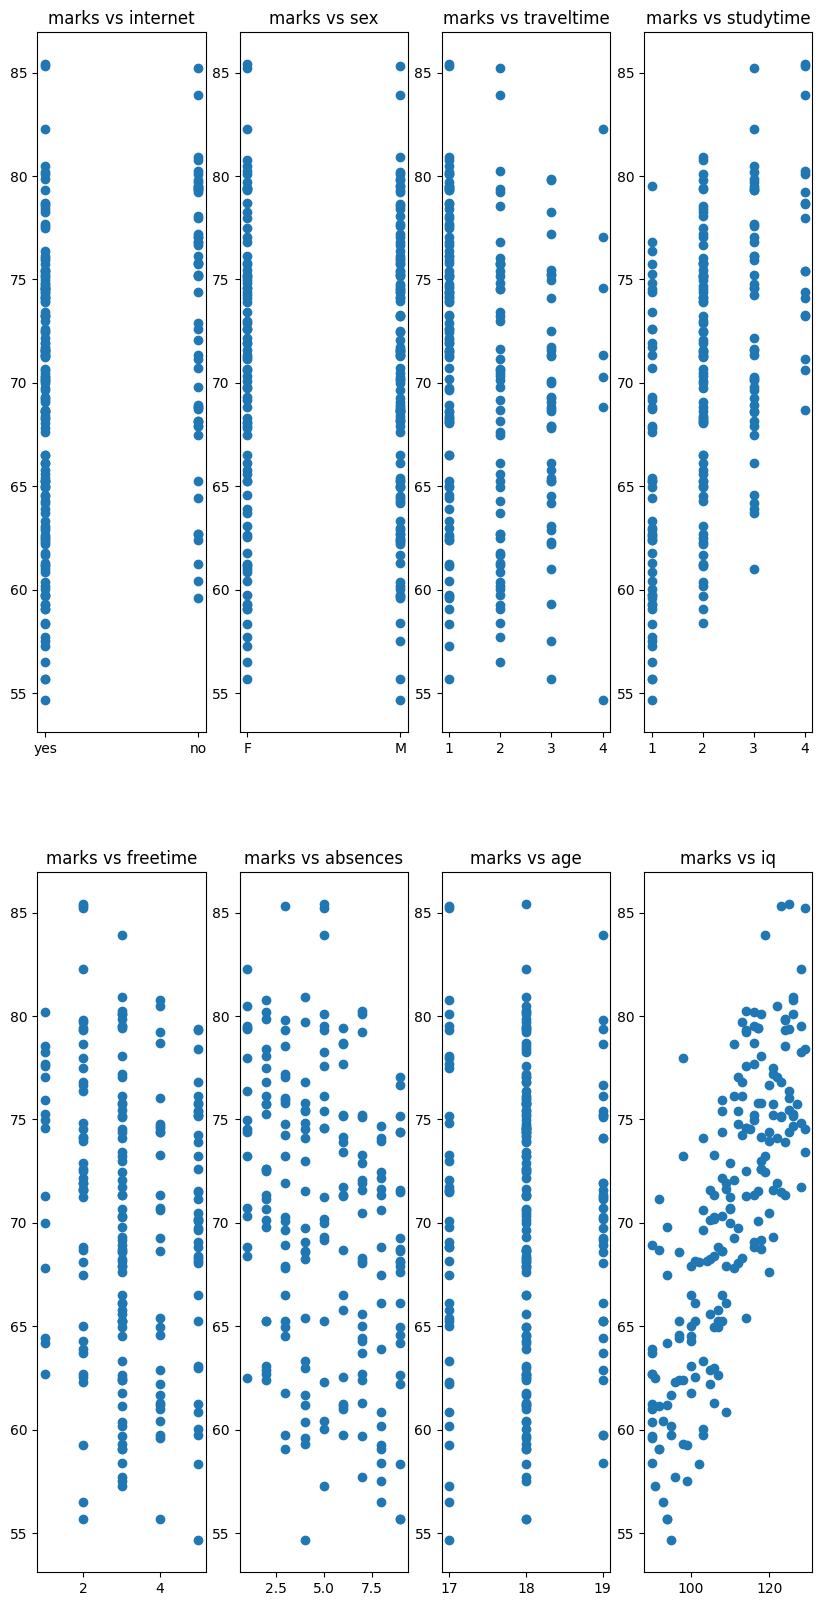

In [77]:
x_train=np.array(data.iloc[:,0:8])
y_train=np.array(data.iloc[:,8]).reshape(-1,1)
fig , graph=plt.subplots(2, 4, figsize=(10,20))
for i in range (4):
  graph[0,i].scatter(x_train[:,i],y_train)
  graph[0,i].set_title(f'marks vs {data.columns[i]}')
  graph[1,i].scatter(x_train[:,(i+4)],y_train)
  graph[1,i].set_title(f'marks vs {data.columns[(i+4)]}')

In [78]:
def feature_changing(x_train):
    label_encoders={}
    for column in range(x_train.shape[1]):
      if isinstance(x_train[0,column],str):
        le=LabelEncoder()
        x_train[:,column]=le.fit_transform(x_train[:,column])
        label_encoders[column]=le
    return x_train
x_train=feature_changing(x_train)

In [79]:
def z_score(x_train):
    x_mean=np.mean(x_train,axis=0)
    x_std=np.std(x_train,axis=0)
    x_train=(x_train-x_mean)/x_std
    return x_train,x_std,x_mean

In [81]:
def cost(x_train,y_train,w,b):
    m=len(y_train)
    predictions=x_train.dot(w)+b
    error=predictions-y_train
    cost=(1/(2*m))*np.sum(error**2)
    return cost

In [82]:
def gradient_descent(x_train,y_train,w,b,learning_rate=0.01):
    m=len(y_train)
    predictions=x_train.dot(w)+b
    error=predictions-y_train
    grad_w=(1 / m)*x_train.T.dot(error)
    grad_b=(1 / m)*np.sum(error)
    w=w-learning_rate*grad_w
    b=b-learning_rate*grad_b
    return w,b

In [83]:
x_train=x_train.astype(np.float64)
x_train,x_std,x_mean=z_score(x_train)
np.random.seed(2147483647)
w=np.random.randn(x_train.shape[1],1)
b=np.random.randn(1)
old_cost = 0
while abs(old_cost-cost(x_train,y_train,w,b))>0.00001:
  old_cost=cost(x_train,y_train,w,b)
  w,b=gradient_descent(x_train,y_train,w,b)
x_predict=data1.iloc[:,:8].to_numpy()
x_predict=feature_changing(x_predict)
x_predict=(x_predict-x_mean)/x_std
ans=data1.iloc[:,8].to_numpy()
y_predict=np.dot(x_predict,w)+b
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5:
    accuracy+= 1
accuracy=round(accuracy*100/200.0,2)
ok='Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
